In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using StatsBase, Distributions, Plots, LinearAlgebra, Plots

In [3]:
using Revise

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 

In [247]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]


n_samples = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_samples, 1)
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_samples, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.211628   0.0251827
 0.117312   0.104592
 0.188988   0.088029
 0.0987156  0.0684219
 0.0591549  0.068963
 0.133975   0.0915448
 0.235938   0.159644
 0.186456   0.167715
 0.267404   0.169969
 0.12706    0.138803
 ⋮          
 0.186384   0.171838
 0.219899   0.159143
 0.19165    0.125129
 0.188269   0.126167
 0.0742176  0.140929
 0.205466   0.0788655
 0.257408   0.121958
 0.195733   0.157993
 0.134502   0.132263

In [265]:
Y = collect(test_returns[2:end,:])
T = n_samples
p = 1
X = hcat(ones(T-1), test_returns[p:end-1,:])
k= 2 #n_regimes
n_variables = 2

#Β = [randn(n_variables, n_variables+1) for _ in 1:k]

Β1 = [.06 .35 .25; .035 .2 .65]

Β2 = [-.05 .45 .15; .035 .15 .63]

Β = [Β1, Β2]

Σ1 = cor2cov([1 .1; .1 1], [.05, .02])
Σ2 = cor2cov([1 .5; .5 1], [.10, .05]) 
Σ = [Σ1, Σ2]

#Σ = rand(InverseWishart(4, [.001 0; 0 .015]),k)

#init_regimes = rand(k) 
#init_regimes = init_regimes ./ sum(init_regimes)

t_m = [.55 .45;.45 .55]

result = expectation_maximisation(Y, X, k, Β, Σ, t_m, 50)



MSVARResult([4.4296121190605634e-14 0.9999999999999558; 3.106944123039996e-14 0.9999999999999689; … ; 2.944339693104576e-14 0.9999999999999705; 2.43027372670946e-14 0.9999999999999757], [4.4296121191073587e-14 0.9999999999999933; 3.106944123072782e-14 1.0000000000000064; … ; 2.9443396931355904e-14 0.9999999999999705; 2.43027372670946e-14 0.9999999999999757], [5.497961725395219e-90 1.0; 1.0557795676176889e-11 0.9999999999894422], Any[[-8230.694495918246 20138.533307414724 -20590.528623570877; 1743.0857381511498 -3773.878248031516 7701.446268632952], [0.06824562806468974 0.2687106564417285 0.3206266703860944; 0.032137994436943665 0.09945766565686928 0.6107757000831937]], Any[[0.0056021321187673416 -0.001469315562230734; -0.0014693155622307343 0.0021054703706968056], [0.011962107876955161 0.0006087285799768782; 0.0006087285799768782 0.000928865210196673]], [2627.7070236495833, 2480.374443726428, 2567.420817921638, 2741.1431742022437, 2842.9656140085744, 2878.7732867674126, 2882.8028412216

In [298]:
round.(result.regimes, digits=4)

999×2 Matrix{Float64}:
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 ⋮    
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

In [299]:
round.(result.smoothed_regimes, digits=4)

999×2 Matrix{Float64}:
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 ⋮    
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

In [300]:
all(result.smoothed_regimes .> 0)

true

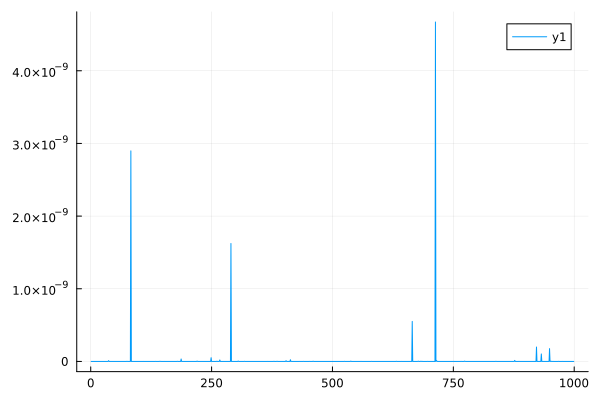

In [316]:
plot(result.smoothed_regimes[:,1])


In [302]:
result.Β


2-element Vector{Any}:
 [-8230.694495918246 20138.533307414724 -20590.528623570877; 1743.0857381511498 -3773.878248031516 7701.446268632952]
 [0.06824562806468974 0.2687106564417285 0.3206266703860944; 0.032137994436943665 0.09945766565686928 0.6107757000831937]

In [303]:
result.Σ

2-element Vector{Any}:
 [0.0056021321187673416 -0.001469315562230734; -0.0014693155622307343 0.0021054703706968056]
 [0.011962107876955161 0.0006087285799768782; 0.0006087285799768782 0.000928865210196673]

In [304]:
result.transition_matrix

2×2 Matrix{Float64}:
 5.49796e-90  1.0
 1.05578e-11  1.0

In [305]:
sum(result.transition_matrix, dims=2)

2×1 Matrix{Float64}:
 1.0
 1.0

In [306]:
l = result.likehoods

50-element Vector{Float64}:
 2627.7070236495833
 2480.374443726428
 2567.420817921638
 2741.1431742022437
 2842.9656140085744
 2878.7732867674126
 2882.8028412216504
 2884.5224687673895
 2887.9722408041484
 2876.6798030388927
    ⋮
 2879.978228364717
 2879.978228364717
 2879.978228364717
 2879.978228364717
 2879.978228364717
 2879.978228364717
 2879.978228364717
 2879.978228364717
 2879.978228364717

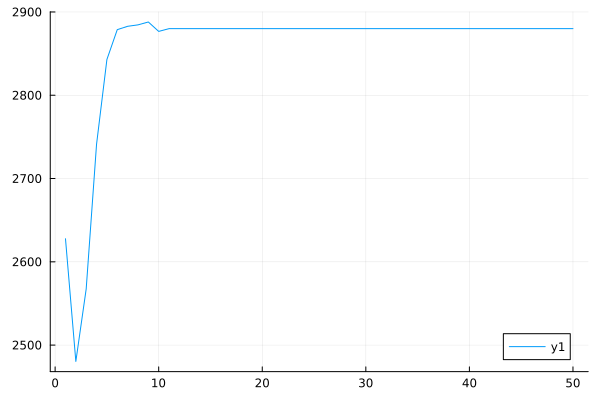

In [307]:
plot(l)

In [308]:
init_regimes =  initial_regimes_probs(result.transition_matrix)

MethodError: MethodError: no method matching initial_regimes_probs(::Matrix{Float64})
The function `initial_regimes_probs` exists, but no method is defined for this combination of argument types.

In [309]:
log_likehood(Y,X,result.Β, result.Σ, result.transition_matrix, init_regimes)

2879.9782283646828 + 0.0im

- zwraca transition matrix ktorej warotsci nie sumuja si edo jedngo
- dziwne wartosci coefficients
- zwraca regime probs, gdzie regime 1 jest cały czas jeden
- przetestowac transition matrix, gdy regime probs sa 1 0, rozne kombinacje

In [310]:
init_regimes = initial_regimes_probs(result.transition_matrix)
jr = joined_regimes_probs(result.regimes, result.smoothed_regimes, init_regimes, result.transition_matrix)
#sum(jr, dims=2)

MethodError: MethodError: no method matching initial_regimes_probs(::Matrix{Float64})
The function `initial_regimes_probs` exists, but no method is defined for this combination of argument types.

In [311]:
est_r = est_transition_matrix(jr[1:end,:], result.regimes[2:end,:], init_regimes)


MethodError: MethodError: no method matching est_transition_matrix(::Matrix{Float64}, ::Matrix{Float64}, ::Vector{Float64})
The function `est_transition_matrix` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  est_transition_matrix(::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\src\ESGModels\msvar.jl:112


In [312]:
sum(est_r, dims=2)

UndefVarError: UndefVarError: `est_r` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [313]:
r = [.9 .1; .8 .2; .85 .15]


3×2 Matrix{Float64}:
 0.9   0.1
 0.8   0.2
 0.85  0.15